c:\Users\pppfk\Documents\studia\systemy rozmyte lab\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


12.95468509984639


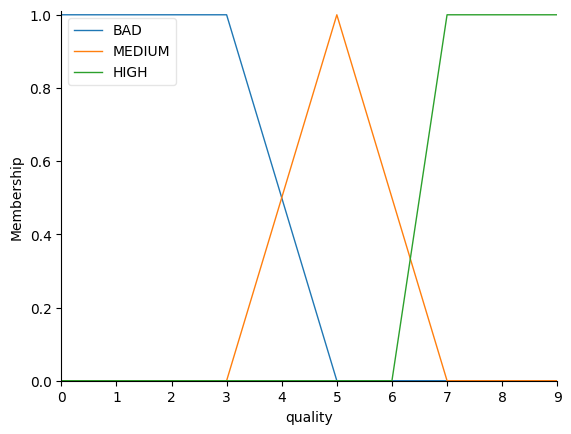

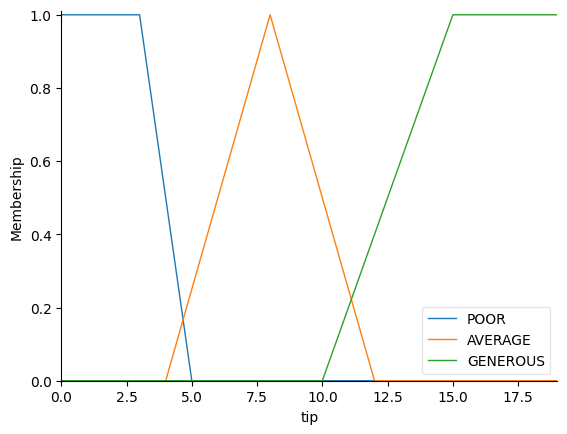

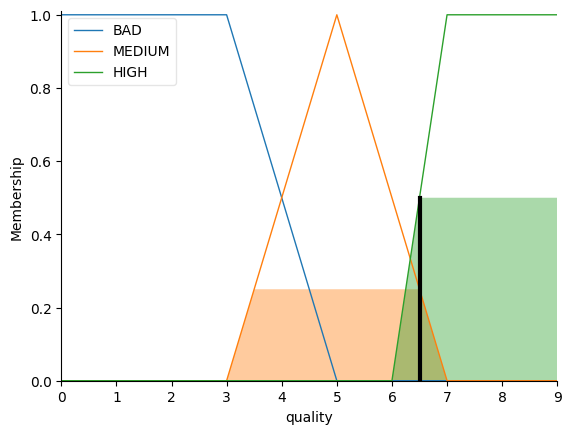

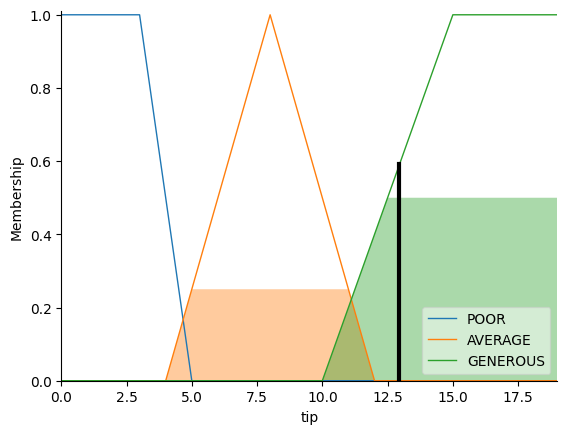

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# zmienna wejściowa
quality_of_service = ctrl.Antecedent(np.arange(0, 10, 1), 'quality')
# zmienna wyjściowa
tip = ctrl.Consequent(np.arange(0, 20, 1), 'tip')
# funkcje przynależności do zmiennej wejściowej
quality_of_service['BAD'] = fuzz.trapmf(quality_of_service.universe, [0, 0, 3, 5])
quality_of_service['MEDIUM'] = fuzz.trimf(quality_of_service.universe, [3, 5, 7])
quality_of_service['HIGH'] = fuzz.trapmf(quality_of_service.universe, [6, 7, 10, 10])
quality_of_service.view()
# funkcje przynależności do zmiennej wyjściowej
tip['POOR'] = fuzz.trapmf(tip.universe, [0, 0, 3, 5])
tip['AVERAGE'] = fuzz.trimf(tip.universe, [4, 8, 12])
tip['GENEROUS'] = fuzz.trapmf(tip.universe, [10, 15, 20, 20])
tip.view()
# reguły rozmyte
rule1 = ctrl.Rule(quality_of_service['BAD'], tip['POOR'])
rule2 = ctrl.Rule(quality_of_service['MEDIUM'], tip['AVERAGE'])
rule3 = ctrl.Rule(quality_of_service['HIGH'], tip['GENEROUS'])
# definiujemy sterownik rozmyty
# sterownik składa z reguł rozmytych
# ale same reguły składają się ze zdefiniowanych wcześniej
# wejść/wyjść
tipper_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# symulacja działania sterownika
tipper_simulation = ctrl.ControlSystemSimulation(tipper_ctrl)
# ustalamy wejście ostre (crisp)
tipper_simulation.input['quality'] = 6.5
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])
plt.show()





4. Wyobraź sobie, że tworzysz sterownik rozmyty dla autonomicznego pojazdu.
Załóżmy, że autonomiczny pojazd potrafi zmierzyć odległość od najbliższego pojazdu w metrach i
jednocześnie jego hamulce są sterowane za pomocą poziomów od 0 (brak hamowania) do 6 (bardzo
mocne hamowanie), przy czym poziomy są ciągłe (to znaczy możliwa jest dowolna wartość w
przedziale [0, 6]). Za pomocą pakietu scikit-fuzzy zamodeluj zmienną lingwistyczną odległość od
najbliższego pojazdu, która będzie zmienną wejściową i zmienną lingwistyczną hamowanie, która
będzie zmienną wyjściową; następnie zaproponuj rozmyte reguły wnioskowania, które będą na
postawie odległości od najbliższego pojazdu proponować hamowanie w celu uniknięcia kolizji z
tym pojazdem.


In [12]:
# zmienna wejściowa
distance = ctrl.Antecedent(np.arange(0, 200, 1), 'distance')
# zmienna wyjściowa
braking = ctrl.Consequent(np.arange(0, 6, 0.01), 'braking')

c:\Users\pppfk\Documents\studia\systemy rozmyte lab\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


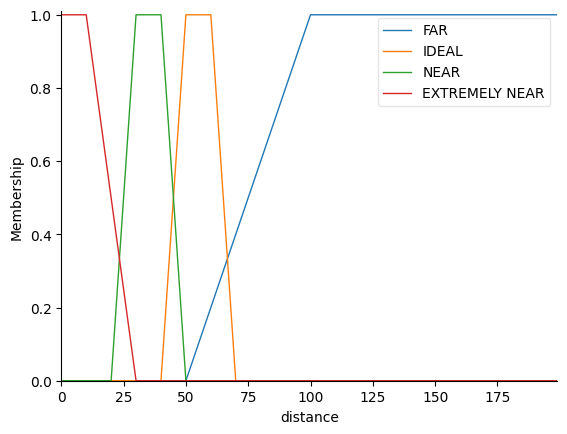

In [13]:
# funkcje przynależności do zmiennej wejściowej
distance['FAR'] = fuzz.trapmf(distance.universe, [50, 100, 200, 200])
distance['IDEAL'] = fuzz.trapmf(distance.universe, [40, 50, 60, 70])
distance['NEAR'] = fuzz.trapmf(distance.universe, [20, 30, 40, 50])
distance['EXTREMELY NEAR'] = fuzz.trapmf(distance.universe, [0, 0, 10, 30])
distance.view()

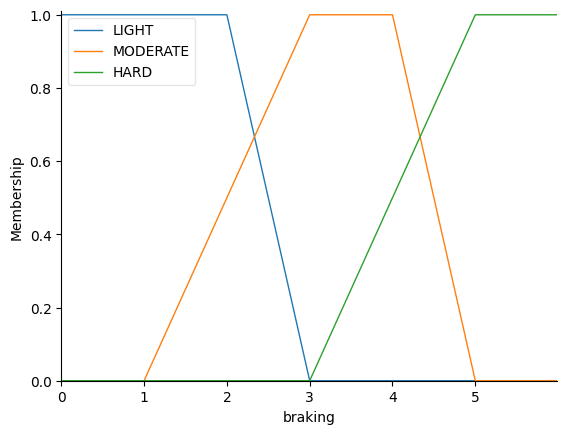

In [14]:
# funkcje przynależności do zmiennej wyjściowej
braking["LIGHT"] = fuzz.trapmf(braking.universe, [0, 0, 2, 3])
braking["MODERATE"] = fuzz.trapmf(braking.universe, [1, 3, 4, 5])
braking["HARD"] = fuzz.trapmf(braking.universe, [3, 5, 6, 6])
braking.view()

In [16]:
rule1 = ctrl.Rule(distance['EXTREMELY NEAR'], braking['HARD'])
rule2 = ctrl.Rule(distance['NEAR'], braking['MODERATE'])
rule3 = ctrl.Rule(distance['IDEAL'], braking['LIGHT'])
rule4 = ctrl.Rule(distance['FAR'], braking['LIGHT'])

c:\Users\pppfk\Documents\studia\systemy rozmyte lab\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'braking': np.float64(1.266666666666668)}


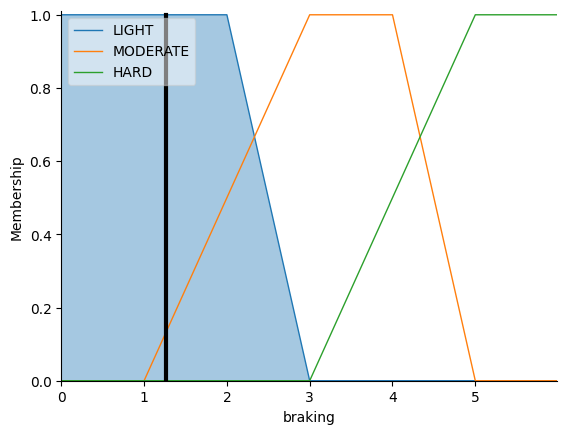

In [33]:
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
# symulacja działania sterownika
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)

# ustalamy wejście ostre (crisp)
braking_simulation.input['distance'] = 200
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
braking_simulation.compute()
braking.view(sim=braking_simulation)
print(braking_simulation.output)
# plt.show()

5. Rozwiń model w poprzedniego zadania o nową zmienną wejściową, jaką jest wilgotność
nawierzchni drogowej (ponownie zakładamy, że pojazd autonomiczny potrafi ocenić za pomocą
czujnika tę wielkość). Pamiętaj, że droga efektywnego hamownia zależy m.in. właśnie od poziomu
wilgotności powierzchni.

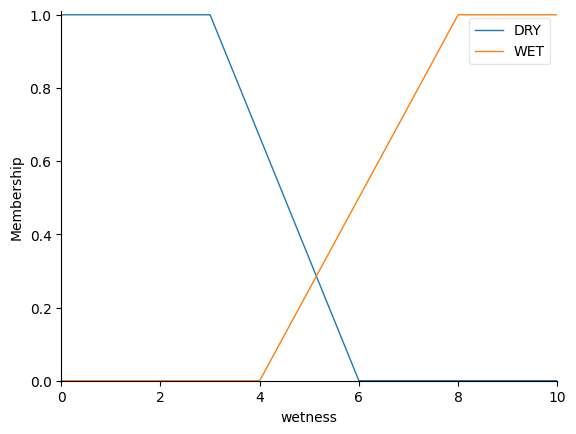

In [36]:
# zmienna wejściowa
wetness = ctrl.Antecedent(np.arange(0, 11, 1), 'wetness')
# funkcje przynależności do zmiennej wejściowej
wetness['DRY'] = fuzz.trapmf(wetness.universe, [0, 0, 3, 6])
wetness['WET'] = fuzz.trapmf(wetness.universe, [4, 8, 10, 10])
wetness.view()

In [37]:
rule1 = ctrl.Rule(wetness['WET'] & distance['EXTREMELY NEAR'], braking['HARD'])
rule2 = ctrl.Rule(wetness['DRY'] & distance['EXTREMELY NEAR'], braking['HARD'])
rule3 = ctrl.Rule(wetness['WET'] & distance['NEAR'], braking['HARD'])
rule4 = ctrl.Rule(wetness['DRY'] & distance['NEAR'], braking['MODERATE'])
rule5 = ctrl.Rule(wetness['WET'] & distance['IDEAL'], braking['MODERATE'])
rule6 = ctrl.Rule(wetness['DRY'] & distance['IDEAL'], braking['LIGHT'])
rule7 = ctrl.Rule(wetness['WET'] & distance['FAR'], braking['LIGHT'])
rule8 = ctrl.Rule(wetness['DRY'] & distance['FAR'], braking['LIGHT'])

In [ ]:
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
# symulacja działania sterownika
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)

# ustalamy wejście ostre (crisp)
braking_simulation.input['distance'] = 200
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
braking_simulation.compute()
braking.view(sim=braking_simulation)
print(braking_simulation.output)